In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Install required libraries
!pip install -U kaleido
!pip install sastrawi

In [3]:
# Import required libraries

# Libraries for Data Manipulation
import pandas as pd
import time
import json
import csv
from datetime import datetime
import numpy as np
import random
import pickle
import joblib

# Libraries for NLP Preprocessing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Added to download the missing resource
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


# Libraries for modeling & evaluation
from sklearn.utils import class_weight
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from math import *

# Libraries for Vizualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from wordcloud import WordCloud, STOPWORDS

# Library for Ignore Warning Error
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
data = pd.read_excel("/content/Kenaikan gaji dpr fix.xlsx")
data


,User,Author,Isi,Tanggal
0,Amelia12,amelcewaw34,"Harusnya tunda dulu, masih banyak rakyat yang ...",05/09/2025 05:36
1,Budi88,budz_21_56,"Gajinya dinaikin terus, kerja gak jelas hasilnya",05/14/2025 10:22
2,Citra102,citcit_12_78,Kalau sesuai kinerja sih gak masalah,05/02/2025 14:41
3,Fahri67,fahrizr89,"Kalau buat peningkatan kualitas kerja, aku dukung",05/28/2025 08:05
4,Dewi51,dewidw42,"Heran, kinerja belum maksimal tapi gaji minta ...",05/19/2025 21:11
...,...,...,...,...
995,Ivan5915,kritik536,"Aku di posisi tengah, tapi kalau manfaatnya ng...",05/13/2025 20:50
996,Fajar8780,kritik760,Proses jujur dan terbuka? wkwkwkwk rakyat menu...,05/05/2025 20:21
997,Bayu2951,komen945,"Kerja aja belum ada wujudnya, tapi udah berani...",05/29/2025 12:04
998,Siti7460,posting863,Penjelasan detail lebih dulu harus diberikan s...,05/30/2025 00:39


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User     1000 non-null   object
 1   Author   1000 non-null   object
 2   Isi      1000 non-null   object
 3   Tanggal  1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [6]:
check_duplicate = data[data.duplicated('Isi')]
check_duplicate

,User,Author,Isi,Tanggal
279,Siti7730,komen73,"Masyarakat diceburkan dalam kesengsaraan, seme...",05/15/2025 09:09
871,Lina5456,netizen620,"Pajak meningkat, utang membesar, programnya ma...",05/06/2025 01:34


In [7]:
data = data.drop_duplicates(subset=['Isi'], keep='first')
data = data.reset_index(drop = True)
data

,User,Author,Isi,Tanggal
0,Amelia12,amelcewaw34,"Harusnya tunda dulu, masih banyak rakyat yang ...",05/09/2025 05:36
1,Budi88,budz_21_56,"Gajinya dinaikin terus, kerja gak jelas hasilnya",05/14/2025 10:22
2,Citra102,citcit_12_78,Kalau sesuai kinerja sih gak masalah,05/02/2025 14:41
3,Fahri67,fahrizr89,"Kalau buat peningkatan kualitas kerja, aku dukung",05/28/2025 08:05
4,Dewi51,dewidw42,"Heran, kinerja belum maksimal tapi gaji minta ...",05/19/2025 21:11
...,...,...,...,...
993,Ivan5915,kritik536,"Aku di posisi tengah, tapi kalau manfaatnya ng...",05/13/2025 20:50
994,Fajar8780,kritik760,Proses jujur dan terbuka? wkwkwkwk rakyat menu...,05/05/2025 20:21
995,Bayu2951,komen945,"Kerja aja belum ada wujudnya, tapi udah berani...",05/29/2025 12:04
996,Siti7460,posting863,Penjelasan detail lebih dulu harus diberikan s...,05/30/2025 00:39


In [8]:
# Process Cleaning
def cleaningText(tweets):
    # Convert text to lowercase
    tweets = tweets.lower()
    # Remove non-ascii characters from the string
    tweets = re.sub(r'[^\x00-\x7f]',r'', tweets)
    # Replace 2+ dots with space
    tweets = re.sub(r'\.{2,}', ' ', tweets)
    # Remove @username
    tweets = re.sub(r"(?:\@|https?\://)\S+", "", tweets)
    # Remove old style retweet text "RT"
    tweets = re.sub(r'RT', '', tweets)
    # Remove newline
    tweets = tweets.replace('\n','')
    # Remove hashtags
    tweets = re.sub(r'#\S+', ' ', tweets)
    # Remove single character
    pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
    tweets = re.sub("\s+", " ", re.sub(pattern, '', tweets))
    # Remove number
    tweets = re.sub(r"[^a-zA-Z^']", " ", tweets)
    # Remove url
    tweets = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", tweets)
    tweets = re.sub(r"http\S+", "", tweets)
    # Strip space, " and ' from tweet
    tweets = tweets.strip(' "\'')
    # Replace multiple spaces with a single space
    tweets = re.sub(r'\s+', ' ', tweets)
    # Remove punctuation
    tweets = tweets.translate(str.maketrans("","",string.punctuation))
    return tweets

data['Isi'] = data['Isi'].apply(cleaningText)

print('Cleaning Text Result : \n')
print(data['Isi'].head(50))

<>:19: SyntaxWarning:

invalid escape sequence '\s'

<>:19: SyntaxWarning:

invalid escape sequence '\s'

/tmp/ipython-input-2155761234.py:19: SyntaxWarning:

invalid escape sequence '\s'



Cleaning Text Result : 

0     harusnya tunda dulu masih banyak rakyat yang n...
1       gajinya dinaikin terus kerja gak jelas hasilnya
2                  kalau sesuai kinerja sih gak masalah
3      kalau buat peningkatan kualitas kerja aku dukung
4     heran kinerja belum maksimal tapi gaji minta naik
5     perasaan gue udah capek liat drama gaji tiap t...
6     cocoknya dpr dibubarkan aja daripada menyusahk...
7     mantap tunjangan cair tapi korupsi lancar ini ...
8     kalau tujuannya untuk bikin kerja lebih berkua...
9       tidak ada kinerjanya uu perampasan aset ke mana
10    luar biasa uang tunjangan jalan terus korupsi ...
11    dengan gaji jt berani gak mereka kasih uud per...
12    jangan cuma propaganda kerjain dulu baru minta...
13                  kiamat sudah mulai seriusan nih btw
14    bisa jadi wajar kalau ada evaluasi dan manfaat...
15    masih masuk akal kok asalkan dievaluasi dan ad...
16    gila mereka minta tambah gaji pas harga kebutu...
17    selama itu bisa n

In [9]:
# Process Remove symbol
def remove_symbol(tweets):
    tweets = ''.join(re.sub(r"[\!\@\#\$\%\^\&\*\(\)\?\,\"\|\:]+", "", tweets))
    return tweets

data['Isi'] = data['Isi'].apply(remove_symbol)
print('Remove Symbol Result : \n')
print(data['Isi'].head(50))

Remove Symbol Result : 

0     harusnya tunda dulu masih banyak rakyat yang n...
1       gajinya dinaikin terus kerja gak jelas hasilnya
2                  kalau sesuai kinerja sih gak masalah
3      kalau buat peningkatan kualitas kerja aku dukung
4     heran kinerja belum maksimal tapi gaji minta naik
5     perasaan gue udah capek liat drama gaji tiap t...
6     cocoknya dpr dibubarkan aja daripada menyusahk...
7     mantap tunjangan cair tapi korupsi lancar ini ...
8     kalau tujuannya untuk bikin kerja lebih berkua...
9       tidak ada kinerjanya uu perampasan aset ke mana
10    luar biasa uang tunjangan jalan terus korupsi ...
11    dengan gaji jt berani gak mereka kasih uud per...
12    jangan cuma propaganda kerjain dulu baru minta...
13                  kiamat sudah mulai seriusan nih btw
14    bisa jadi wajar kalau ada evaluasi dan manfaat...
15    masih masuk akal kok asalkan dievaluasi dan ad...
16    gila mereka minta tambah gaji pas harga kebutu...
17    selama itu bisa n

In [10]:
# Process Tokenizing
def tokenizingText(tweets):
    return word_tokenize(tweets)

data['Isi'] = data['Isi'].apply(tokenizingText)
print('Tokenizing Result : \n')
print(data['Isi'].head(50))

Tokenizing Result : 

0     [harusnya, tunda, dulu, masih, banyak, rakyat,...
1     [gajinya, dinaikin, terus, kerja, gak, jelas, ...
2           [kalau, sesuai, kinerja, sih, gak, masalah]
3     [kalau, buat, peningkatan, kualitas, kerja, ak...
4     [heran, kinerja, belum, maksimal, tapi, gaji, ...
5     [perasaan, gue, udah, capek, liat, drama, gaji...
6     [cocoknya, dpr, dibubarkan, aja, daripada, men...
7     [mantap, tunjangan, cair, tapi, korupsi, lanca...
8     [kalau, tujuannya, untuk, bikin, kerja, lebih,...
9     [tidak, ada, kinerjanya, uu, perampasan, aset,...
10    [luar, biasa, uang, tunjangan, jalan, terus, k...
11    [dengan, gaji, jt, berani, gak, mereka, kasih,...
12    [jangan, cuma, propaganda, kerjain, dulu, baru...
13           [kiamat, sudah, mulai, seriusan, nih, btw]
14    [bisa, jadi, wajar, kalau, ada, evaluasi, dan,...
15    [masih, masuk, akal, kok, asalkan, dievaluasi,...
16    [gila, mereka, minta, tambah, gaji, pas, harga...
17    [selama, itu, bisa, 

In [11]:
# Process Stemming
def stemmingText(tweets):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in tweets]
    return tweets

data['Isi'] = data['Isi'].apply(stemmingText)
print('Stemming Result : \n')
print(data['Isi'].head(50))

Stemming Result : 

0     [harusnya, tunda, dulu, masih, banyak, rakyat,...
1     [gajinya, dinaikin, terus, kerja, gak, jelas, ...
2           [kalau, sesuai, kinerja, sih, gak, masalah]
3     [kalau, buat, peningkatan, kualitas, kerja, ak...
4     [heran, kinerja, belum, maksimal, tapi, gaji, ...
5     [perasaan, gue, udah, capek, liat, drama, gaji...
6     [cocoknya, dpr, dibubarkan, aja, daripada, men...
7     [mantap, tunjangan, cair, tapi, korupsi, lanca...
8     [kalau, tujuannya, untuk, bikin, kerja, lebih,...
9     [tidak, ada, kinerjanya, uu, perampasan, aset,...
10    [luar, biasa, uang, tunjangan, jalan, terus, k...
11    [dengan, gaji, jt, berani, gak, mereka, kasih,...
12    [jangan, cuma, propaganda, kerjain, dulu, baru...
13           [kiamat, sudah, mulai, seriusan, nih, btw]
14    [bisa, jadi, wajar, kalau, ada, evaluasi, dan,...
15    [masih, masuk, akal, kok, asalkan, dievaluasi,...
16    [gila, mereka, minta, tambah, gaji, pas, harga...
17    [selama, itu, bisa, ni

In [12]:
# Process Stopwords
def filteringText(tweets):
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for twt in tweets:
        if twt not in listStopwords:
            filtered.append(twt)
    tweets = filtered
    return tweets

data['Isi'] = data['Isi'].apply(filteringText)
print('Stopwords Result : \n')
print(data['Isi'].head(50))

Stopwords Result : 

0                             [tunda, rakyat, nganggur]
1             [gajinya, dinaikin, kerja, gak, hasilnya]
2                           [sesuai, kinerja, sih, gak]
3                [peningkatan, kualitas, kerja, dukung]
4                      [heran, kinerja, maksimal, gaji]
5       [perasaan, gue, udah, capek, liat, drama, gaji]
6     [cocoknya, dpr, dibubarkan, aja, menyusahkan, ...
7     [mantap, tunjangan, cair, korupsi, lancar, kes...
8        [tujuannya, bikin, kerja, berkualitas, setuju]
9                    [kinerjanya, uu, perampasan, aset]
10    [uang, tunjangan, jalan, korupsi, aman, rugi, ...
11    [gaji, jt, berani, gak, kasih, uud, perampasan...
12                          [propaganda, kerjain, gaji]
13                         [kiamat, seriusan, nih, btw]
14                   [wajar, evaluasi, manfaat, rakyat]
15      [masuk, akal, dievaluasi, hasil, nyata, rakyat]
16                  [gila, gaji, pas, harga, kebutuhan]
17                  [ningka

In [13]:
# Return the data back to its original form which is not a token
def join_text_list(Text):
    return ' '.join(Text)

data['reply_token'] = data['Isi']

data['Isi'] = data['Isi'].apply(join_text_list)
print(data['Isi'].head(50))

0                                 tunda rakyat nganggur
1                   gajinya dinaikin kerja gak hasilnya
2                                sesuai kinerja sih gak
3                     peningkatan kualitas kerja dukung
4                           heran kinerja maksimal gaji
5               perasaan gue udah capek liat drama gaji
6        cocoknya dpr dibubarkan aja menyusahkan rakyat
7     mantap tunjangan cair korupsi lancar kesejahte...
8              tujuannya bikin kerja berkualitas setuju
9                         kinerjanya uu perampasan aset
10        uang tunjangan jalan korupsi aman rugi rakyat
11    gaji jt berani gak kasih uud perampasan aset k...
12                              propaganda kerjain gaji
13                              kiamat seriusan nih btw
14                        wajar evaluasi manfaat rakyat
15             masuk akal dievaluasi hasil nyata rakyat
16                        gila gaji pas harga kebutuhan
17                       ningkatin kinerja dukun

In [14]:
# Remove data that have NAN value in column reply
data.dropna(subset=['Isi'], inplace = True)
# To reset the index when data with NAN values ​​are removed so that the index numbering matches
data = data.reset_index(drop = True)
# Print the results of the dataframe that has been created
data

,User,Author,Isi,Tanggal,reply_token
0,Amelia12,amelcewaw34,tunda rakyat nganggur,05/09/2025 05:36,"[tunda, rakyat, nganggur]"
1,Budi88,budz_21_56,gajinya dinaikin kerja gak hasilnya,05/14/2025 10:22,"[gajinya, dinaikin, kerja, gak, hasilnya]"
2,Citra102,citcit_12_78,sesuai kinerja sih gak,05/02/2025 14:41,"[sesuai, kinerja, sih, gak]"
3,Fahri67,fahrizr89,peningkatan kualitas kerja dukung,05/28/2025 08:05,"[peningkatan, kualitas, kerja, dukung]"
4,Dewi51,dewidw42,heran kinerja maksimal gaji,05/19/2025 21:11,"[heran, kinerja, maksimal, gaji]"
...,...,...,...,...,...
993,Ivan5915,kritik536,posisi manfaatnya nggak ya buktikan pakai data,05/13/2025 20:50,"[posisi, manfaatnya, nggak, ya, buktikan, paka..."
994,Fajar8780,kritik760,proses jujur terbuka wkwkwkwk rakyat menunggu ...,05/05/2025 20:21,"[proses, jujur, terbuka, wkwkwkwk, rakyat, men..."
995,Bayu2951,komen945,kerja aja wujudnya udah berani gaji malu rakya...,05/29/2025 12:04,"[kerja, aja, wujudnya, udah, berani, gaji, mal..."
996,Siti7460,posting863,penjelasan detail setuju,05/30/2025 00:39,"[penjelasan, detail, setuju]"


In [95]:
# Contoh lexicon sederhana untuk topik Kebijakan Kenaikan Gaji DPR

lexicon_positive = {

    'transparan': 2,
    'akuntabel': 3,
    'jujur': 3,
    'bersih': 3,
    'berintegritas': 3,
    'tidak_korupsi': 3,
    'terbuka': 2,
    'jelas': 2,
    'transparansi': 2,
    'adil': 3,
    'keadilan': 3,
    'merata': 2,
    'sejahtera': 3,
    'kesejahteraan': 3,
    'peduli': 2,
    'empati': 2,
    'prihatin': 1,
    'efektif': 2,
    'efisien': 2,
    'berhasil': 2,
    'sukses': 2,
    'optimal': 2,
    'produktif': 2,
    'berkinerja': 2,
    'kompeten': 2,
    'profesional': 2,
    'mendukung': 2,
    'setuju': 2,
    'dukung': 2,
    'setuju_banget': 3,
    'sepakat': 2,
    'mendukung_penuh': 3,
    'komitmen': 2,
    'bertanggungjawab': 3,
    'tanggung_jawab': 3,
    'komit': 2,
    'konsisten': 2,
    'tepat_janji': 3,
    'progres': 2,
    'kemajuan': 2,
    'perbaikan': 2,
    'peningkatan': 2,
    'reformasi': 2,
    'inovasi': 2,
    'solusi': 2,
    'jalan_keluar': 2,
    'bagus': 2,
    'keren': 2,
    'mantap': 3,
    'hebat': 2,
    'luar_biasa': 3,
    'kagum': 2,
    'senang': 2,
    'bangga': 3,
    'puas': 2,
    'nikmati': 1,
    'terharu': 2,
    'inspiratif': 2,
    'percaya': 2,
    'kepercayaan': 2,
    'partisipasi': 1,
    'aktif': 1,
    'demokratis': 2,
    'pemilu': 1,
    'suara_rakyat': 2,
    'pemberdayaan': 2,
    'memberdayakan': 2,
    'memihak_rakyat': 3,
    'pro_rakyat': 3,
    'berpihak': 2,
    'penghargaan': 2,
    'apresiasi': 2,
}

lexicon_negative = {
    'tidak': -1,
    'naik': -1,      # bisa negatif tergantung konteks
    'kenaikan': -1,  # juga bisa negatif
    'rakyat': -1,
    'marah': -2,
    'protes': -2,
    'menolak': -3,
    'korupsi': -3,
    'tidak_adil': -2,
    'egois': -2,
    'buruk': -2,
    'menyengsarakan': -3,
    'beban': -2,
    'kritik': -1,
    'malu': -2,
    'buktikan':-1,
    'rugi':-2,
    'kiamat':-3,
    'koruptor':-3,
    'utang':-3,
    'hapus':-1,
    'munafik':-2,
    'iblis':-2,
    'sengsara':-2,
    'membengkak':-1,
    'miris':-1,
    'dipaksa':-2,
    'tikus':-3,
    'bubar':-1,
    'serakah':-3,
    'hancur':-2,
    'bobrok':-1,
    'diabaikan':-1,
    'ngos':-1,
    'nikmatin':-1,
    'kacau':-1,
    'nol':-1,
    'memalukan':-1,
    'kocak':-1,
    'perampasan':-1,
    'kere':-1,
    'tragis':-2,
    'sulit':-1,
    'dijajah':-3,
    'rusak':-1,
    'krisis':-2,'gagal': -3,
    'korup': -3,
    'sabotase': -3,
    'sia-sia': -2,
    'kabur': -2,
    'konflik': -2,
    'manipulasi': -3,
    'pelanggaran': -3,
    'pemborosan': -2,
    'penyalahgunaan': -3,
    'pembohongan': -3,
    'pemerasan': -3,
    'pengkhianatan': -3,
    'penipuan': -3,
    'penundaan': -2,
    'pemutusan': -2,
    'ketidakadilan': -3,
    'kesalahan': -2,
    'penyebab': -1,
    'cacat': -2,
    'keluhan': -1,
    'ketidakjelasan': -2,
    'kerusakan': -2,
    'penderitaan': -3,
    'kemarahan': -3,
    'berbahaya': -2,
    'malpraktek': -3,
    'pengecut': -3,
    'penindasan': -3,
    'lemah': -2,
    'penggelapan': -3,
    'pelaku': -1,
    'mengkhianati': -3,
    'merugikan': -3,
    'berlebihan': -1,
    'tidak_jujur': -3,


}


In [96]:
def lexiconLabelingText(text):
    score = 0
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score += lexicon_negative[word]
    polarity = ''
    if score > 0:
        polarity = 'positif'
    elif score < 0:
        polarity = 'negatif'
    else:
        polarity = 'netral'
    return score, polarity


In [97]:
# Results from determine sentiment label of tweets
labeling = data['reply_token'].apply(lexiconLabelingText)
labeling = list(zip(*labeling))
data['label_score'] = labeling[0]
data['label'] = labeling[1]
print(data['label'].value_counts())

label
negatif    488
netral     257
positif    253
Name: count, dtype: int64


In [98]:
# Simpan dataframe lengkap (beserta kolom label_score dan label) ke Excel
data.to_excel('hasil_sentimen.xlsx', index=False)

print("File hasil_sentimen.xlsx sudah tersimpan.")


File hasil_sentimen.xlsx sudah tersimpan.


In [99]:
data

,User,Author,Isi,Tanggal,reply_token,label_score,label
0,Amelia12,amelcewaw34,tunda rakyat nganggur,05/09/2025 05:36,"[tunda, rakyat, nganggur]",-1,negatif
1,Budi88,budz_21_56,gajinya dinaikin kerja gak hasilnya,05/14/2025 10:22,"[gajinya, dinaikin, kerja, gak, hasilnya]",0,netral
2,Citra102,citcit_12_78,sesuai kinerja sih gak,05/02/2025 14:41,"[sesuai, kinerja, sih, gak]",0,netral
3,Fahri67,fahrizr89,peningkatan kualitas kerja dukung,05/28/2025 08:05,"[peningkatan, kualitas, kerja, dukung]",4,positif
4,Dewi51,dewidw42,heran kinerja maksimal gaji,05/19/2025 21:11,"[heran, kinerja, maksimal, gaji]",0,netral
...,...,...,...,...,...,...,...
993,Ivan5915,kritik536,posisi manfaatnya nggak ya buktikan pakai data,05/13/2025 20:50,"[posisi, manfaatnya, nggak, ya, buktikan, paka...",-1,negatif
994,Fajar8780,kritik760,proses jujur terbuka wkwkwkwk rakyat menunggu ...,05/05/2025 20:21,"[proses, jujur, terbuka, wkwkwkwk, rakyat, men...",4,positif
995,Bayu2951,komen945,kerja aja wujudnya udah berani gaji malu rakya...,05/29/2025 12:04,"[kerja, aja, wujudnya, udah, berani, gaji, mal...",-3,negatif
996,Siti7460,posting863,penjelasan detail setuju,05/30/2025 00:39,"[penjelasan, detail, setuju]",2,positif


In [24]:
!pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 50.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [100]:
# View the amount of data for each label on the dataset
fig = px.pie(
    data,
    names='label',
    width=400,
    height=400,
    title='Target Variable: label (Pie Chart)'
)
fig.update_traces(rotation=90, pull=[0.1], textinfo="percent+label")
fig.show()


/tmp/ipython-input-1713149475.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



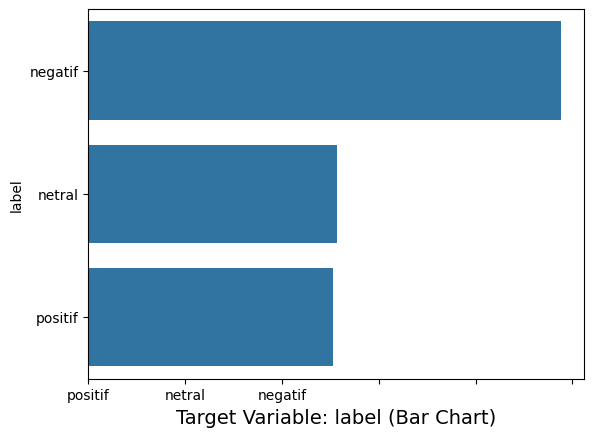

In [101]:
# View the amount of data for each label on the dataset
class_names = ['positif', 'netral', 'negatif']
ax = sns.countplot(data.label)
plt.xlabel('Target Variable: label (Bar Chart)', fontsize=14)
ax.set_xticklabels(class_names)
plt.show()

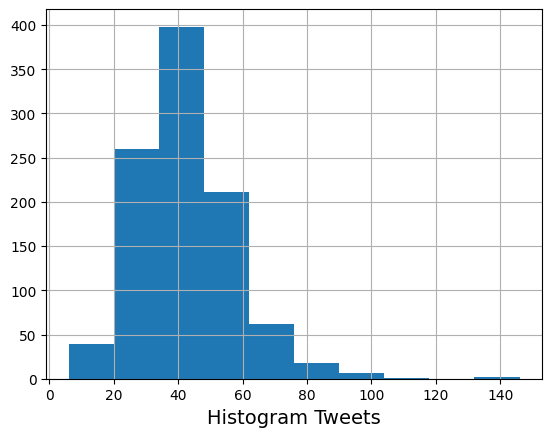

In [102]:
ax = data['Isi'].str.len().hist()
plt.xlabel('Histogram Tweets', fontsize=14)
plt.show()

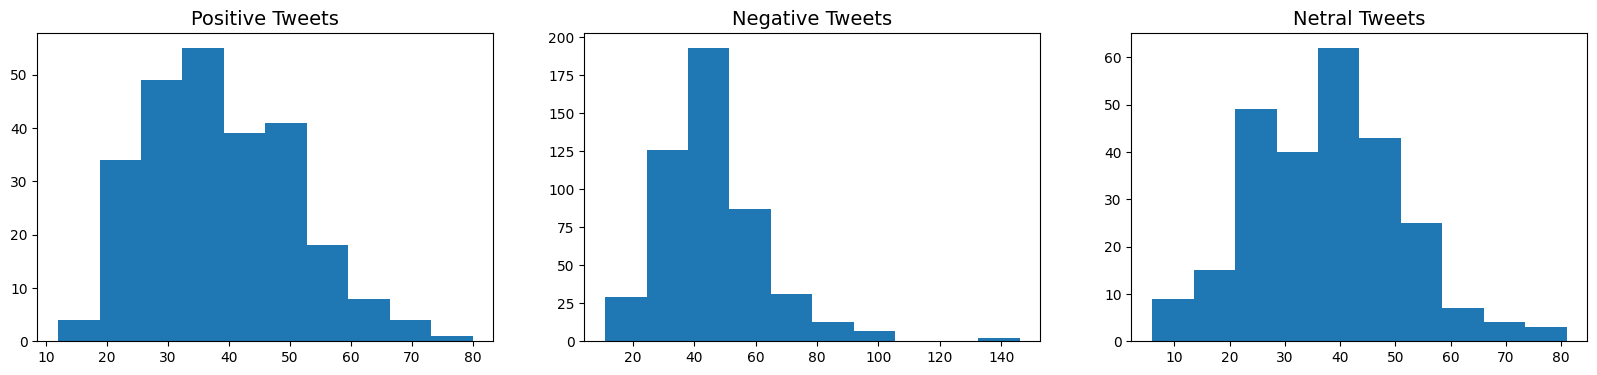

In [103]:
# View distribution histogram tweets of each label
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,4))
ax1.hist(data[data['label']=='positif']['Isi'].str.len())
ax1.set_title('Positive Tweets', fontsize=14)
ax2.hist(data[data['label']=='negatif']['Isi'].str.len())
ax2.set_title('Negative Tweets', fontsize=14)
ax3.hist(data[data['label']=='netral']['Isi'].str.len())
ax3.set_title('Netral Tweets', fontsize=14)
plt.show()

Melatih Model


In [104]:
# Ambil 900 data acak tanpa pengulangan
idx = np.random.choice(data.index, size=900, replace=False)
reduce_data = data.loc[idx].reset_index(drop=True)

# Split data 70% training, 30% testing
train_dataset, test_dataset = train_test_split(reduce_data, test_size=0.3, random_state=101)

train_data = train_dataset[['User', 'Isi', 'label']].reset_index(drop=True)
test_data = test_dataset[['User', 'Isi', 'label']].reset_index(drop=True)

In [105]:
# Define dependent and independent variables
y_test = test_data['label']
X_test = test_data['Isi']
y_train = train_data['label']
X_train = train_data['Isi']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(630,) (630,)
(270,) (270,)


In [106]:
def text_preprocessing(text):
    text = remove_text_special(text)
    text = remove_emoji(text)
    # Tokenizing
    tokens = word_tokenize(text)
    # Removing stop words
    stopwords = stopword_removal(tokens)
    # Create Stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in stopwords]
    return " ".join(stemmed_tokens).strip().lower()

# Remove special text
def remove_text_special(text):
    # Remove stock market tickers like $GE
    text = re.sub(r'\$\w*', '',str(text))
    # Replace kata yang berulang-ulang ('oooooo' menjadi '00')
    text = re.sub(r'(.)\1+', r'\1\1', text)
    # Replace 2+ dots with space
    text = re.sub(r'\.{2,}', ' ', text)
    # Remove @username
    text = re.sub('@[^\s]+','',text)
    # Remove old style retweet text "RT"
    text = re.sub(r'^RT[\s]+', '', text)
    # Remove angka
    text = re.sub('[0-9]+', '', text)
    # Remove url
    text = re.sub(r"http\S+", "", text)
    # Remove hashtags
    text = re.sub(r'#', '', text)
    # Strip space, " and ' from tweet
    text = text.strip(' "\'')
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Remove punctuation
    text = text.translate(str.maketrans("","",string.punctuation))
    # Remove character
    text = text.replace("\n",' ').replace("Diterjemahkan oleh Google",' ').replace("Asli",' ')
    # Remove url uncomplete
    return text.replace("http://", " ").replace("https://", " ")

# Remove emoticon
def remove_emoji(text):
    emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F"  # emoticons
                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                u"\U00002500-\U00002BEF"  # chinese char
                                u"\U00002702-\U000027B0"
                                u"\U00002702-\U000027B0"
                                u"\U000024C2-\U0001F251"
                                u"\U0001f926-\U0001f937"
                                u"\U00010000-\U0010ffff"
                                u"\u2640-\u2642"
                                u"\u2600-\u2B55"
                                u"\u200d"
                                u"\u23cf"
                                u"\u23e9"
                                u"\u231a"
                                u"\ufe0f"  # dingbats
                                u"\u3030"
                                "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    encoded_string = text.encode("ascii", "ignore")
    text = encoded_string.decode()

    return(text)

# Stopword Function
def stopword_removal(text):
    filtering = stopwords.words('indonesian')
    x = []
    data = []
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, text)
    for x in fit:
        data.append(x)
    return data

<>:24: SyntaxWarning:

invalid escape sequence '\s'

<>:24: SyntaxWarning:

invalid escape sequence '\s'

/tmp/ipython-input-1897787135.py:24: SyntaxWarning:

invalid escape sequence '\s'



In [107]:
# 🔥 Terapkan preprocessing pada data training & testing
X_train = X_train.apply(text_preprocessing)
X_test = X_test.apply(text_preprocessing)

# Feature extraction
vect = TfidfVectorizer(
    use_idf=True,
    max_df=0.95,
    min_df=1,
    ngram_range=(1, 2),
    sublinear_tf=True
)

X_train_vec = vect.fit_transform(X_train)
X_test_vec = vect.transform(X_test)

print("X_train shape:", X_train_vec.shape)
print("X_test shape:", X_test_vec.shape)

X_train shape: (630, 3055)
X_test shape: (270, 3055)


In [108]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.utils import class_weight
import time

# Hitung sample weight (pastikan sklearn >= 1.2 untuk support MultinomialNB)
sample_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)

# Define model
naive_bayes = MultinomialNB()

# Parameter grid
b_param_grid = {"alpha": [0.1, 0.5, 1.0, 2.0]}

# 10-fold cross validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV
tuning_naive_bayes = GridSearchCV(
    estimator=naive_bayes,
    param_grid=b_param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    return_train_score=True
)

# 🔥 FIT LANGSUNG DENGAN SPARSE MATRIX (JANGAN .toarray()!)
start = time.time()
tuning_naive_bayes.fit(X_train_vec, y_train, sample_weight=sample_weights)
stop = time.time()

print(f"Training time: {stop - start:.2f} seconds")
print(f"Train Accuracy: {tuning_naive_bayes.score(X_train_vec, y_train):.3f}")
print(f"Best Parameters: {tuning_naive_bayes.best_params_}")
print("\n")

# Tampilkan hasil GridSearch
means = tuning_naive_bayes.cv_results_['mean_test_score']
stds = tuning_naive_bayes.cv_results_['std_test_score']
params = tuning_naive_bayes.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print(f"Mean: {mean:.6f} Std: ({std:.6f}) with: {param}")

Training time: 2.53 seconds
Train Accuracy: 0.976
Best Parameters: {'alpha': 0.5}


Mean: 0.755556 Std: (0.047725) with: {'alpha': 0.1}
Mean: 0.771429 Std: (0.054155) with: {'alpha': 0.5}
Mean: 0.768254 Std: (0.061558) with: {'alpha': 1.0}
Mean: 0.761905 Std: (0.064281) with: {'alpha': 2.0}


Testing time: 0.0018 seconds
Tuning Hyperparameter Naive Bayes accuracy is 80.37%
------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

     negatif     0.8571    0.8696    0.8633       138
      netral     0.7586    0.6286    0.6875        70
     positif     0.7361    0.8548    0.7910        62

    accuracy                         0.8037       270
   macro avg     0.7840    0.7843    0.7806       270
weighted avg     0.8038    0.8037    0.8011       270

------------------------------------------------

Confusion Matrix:


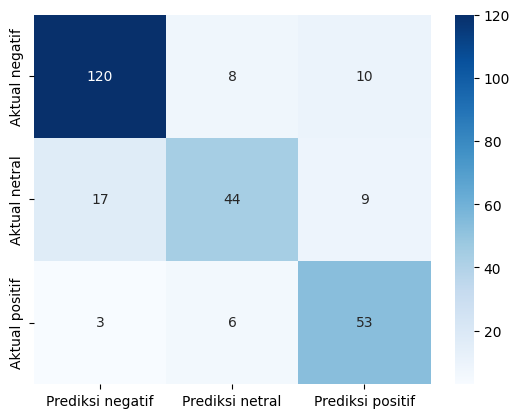

In [109]:
import time
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔥 Prediksi dengan sparse matrix (JANGAN .toarray()!)
start = time.time()
predicted = tuning_naive_bayes.predict(X_test_vec)
stop = time.time()

print(f"Testing time: {stop - start:.4f} seconds")

# Accuracy
accuracy = metrics.accuracy_score(y_test, predicted)
print('Tuning Hyperparameter Naive Bayes accuracy is', f"{accuracy*100:.2f}%")
print('------------------------------------------------\n')

# Classification report
target_names = ['negatif', 'netral', 'positif']
print('Classification Report:')
print(classification_report(y_test, predicted, target_names=target_names, digits=4))
print('------------------------------------------------\n')

# Confusion matrix
print('Confusion Matrix:')
cm = pd.DataFrame(
    confusion_matrix(y_test, predicted),
    index=["Aktual negatif", "Aktual netral", "Aktual positif"],
    columns=["Prediksi negatif", "Prediksi netral", "Prediksi positif"]
)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.show()

In [110]:
import pickle

# Simpan vectorizer dan model
pickle.dump(vect, open('vectorizer.pkl', 'wb'))
pickle.dump(tuning_naive_bayes, open("Tuning-Model-NB.pkl", "wb"))

In [111]:
test_data["Prediction"] = predicted_tuning_naive_bayes
test_data

,User,Isi,label,Prediction
0,Rizal6656,merdeka menderita,netral,negatif
1,Siti8206,gaji perubahan sistem sakit,netral,netral
2,Rosa7274,disuruh nonton sinetron gaji ya gue udah muak,netral,netral
3,Raka7305,posisi dampak positifnya janji buktinya,netral,netral
4,Bella4413,warga dipaksa berjuang seadanya hidup penuh ke...,negatif,negatif
...,...,...,...,...
265,Fajar3689,langkah dijalankan jujur terbuka,positif,netral
266,Rian6036,tikus tikus rakus bener,negatif,negatif
267,Maya1064,netral prosedurnya transparan diaudit,positif,negatif
268,Joko6986,kenaikan gaji perbaikan struktur sistem rusak ...,netral,negatif


In [112]:
test_negatif = test_data[test_data['Prediction'] == 'negatif']
test_negatif

,User,Isi,label,Prediction
0,Rizal6656,merdeka menderita,netral,negatif
4,Bella4413,warga dipaksa berjuang seadanya hidup penuh ke...,negatif,negatif
5,Putu9890,pendapatan usaha parah deh,netral,negatif
6,Nando9205,anak anak kekurangan pejabat asik joget ketawa,netral,negatif
7,Tomi2056,giliran rakyat megap megap inflasi mikirin ken...,negatif,negatif
...,...,...,...,...
263,Mira839,rakyat menderita tertawa bersuka ria,negatif,negatif
266,Rian6036,tikus tikus rakus bener,negatif,negatif
267,Maya1064,netral prosedurnya transparan diaudit,positif,negatif
268,Joko6986,kenaikan gaji perbaikan struktur sistem rusak ...,netral,negatif


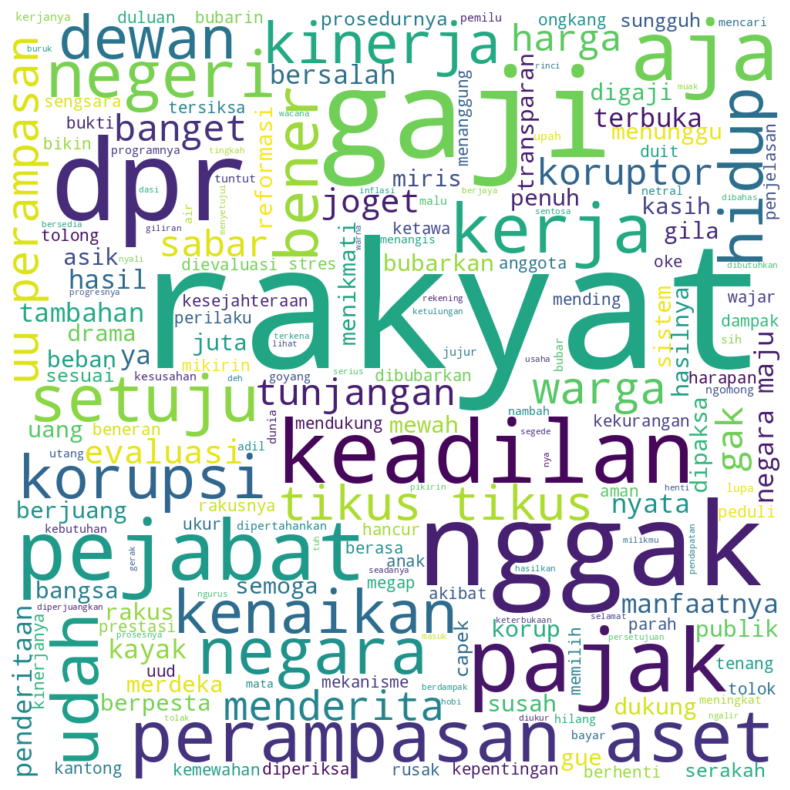

In [113]:
words = ' '.join(test_negatif["Isi"])

wordcloud = WordCloud(width=1000, height=1000, mode='RGBA', background_color='white').generate(words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
wordcloud.to_file('Negatif.png')
plt.show()

In [114]:
test_positif = test_data[test_data['Prediction'] == 'positif']
test_positif

,User,Isi,label,Prediction
13,Siti9041,tunjangan nggak telat korupsi nggak berhenti r...,negatif,positif
14,Fikri6378,rakyat meledak kesal,negatif,positif
23,Sinta195,rakyat menderita merdeka beban,negatif,positif
27,Siti8075,korupsi negeri bikin rakyat menanggung akibatnya,negatif,positif
40,Agus7552,dapet tunjangan korupsi jalan rakyat penonton,negatif,positif
57,Nadia9622,keadilan hadir negeri,positif,positif
68,Joko5482,kesulitan rakyat terbebani pajak berpesta ria,negatif,positif
72,Siti6463,dewan model bikin bangsa bahan tertawaan bubar...,negatif,positif
73,Sari8223,gaji reformasi inovasi inovasi menutupi kebobr...,positif,positif
76,Gilang4340,kerja nyata janji gaji,netral,positif


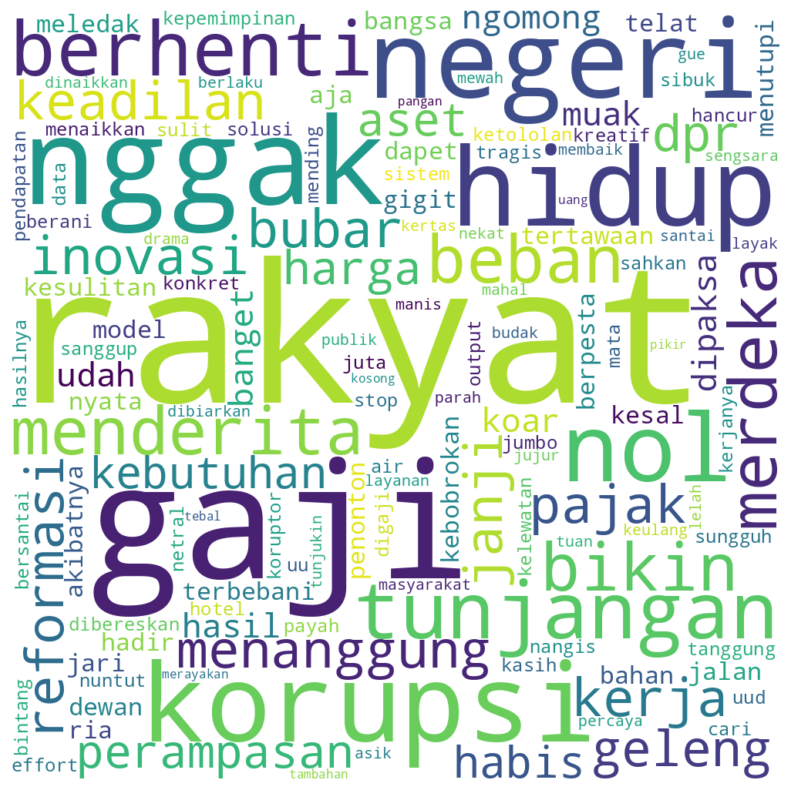

In [115]:
words = ' '.join(test_positif["Isi"])

wordcloud = WordCloud(width=1000, height=1000, mode='RGBA', background_color='white').generate(words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
wordcloud.to_file('Positif.png')
plt.show()

In [116]:
test_netral = test_data[test_data['Prediction'] == 'netral']
test_netral

,User,Isi,label,Prediction
1,Siti8206,gaji perubahan sistem sakit,netral,netral
2,Rosa7274,disuruh nonton sinetron gaji ya gue udah muak,netral,netral
3,Raka7305,posisi dampak positifnya janji buktinya,netral,netral
15,Bella5047,rakusnya tikus tikus bikin kesal,negatif,netral
16,Dimas9377,udah kaya nambah nambah,netral,netral
...,...,...,...,...
250,Fajar4650,semoga bersemangat,netral,netral
259,Rosa9366,rakyat kesulitan wakil rakyat menikmati kenyam...,negatif,netral
261,Rizal4023,rakyat dicekik kesengsaraan berfoya foya kemew...,negatif,netral
262,Dimas6755,dpr fokus urus keuntungan pribadi rakyat tersiksa,negatif,netral


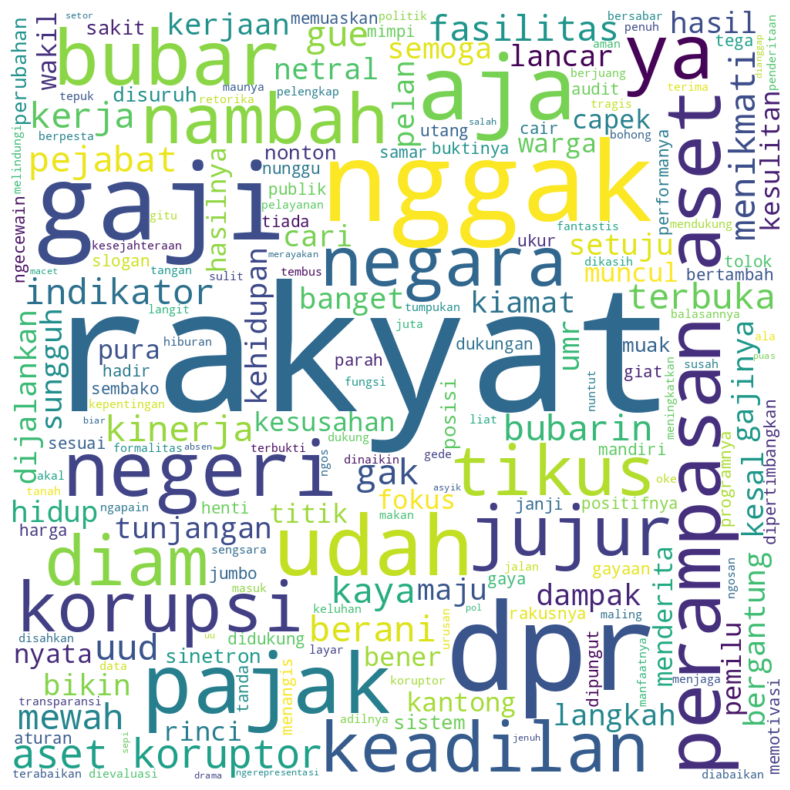

In [117]:
words = ' '.join(test_netral["Isi"])

wordcloud = WordCloud(width=1000, height=1000, mode='RGBA', background_color='white').generate(words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
wordcloud.to_file('Netral.png')
plt.show()

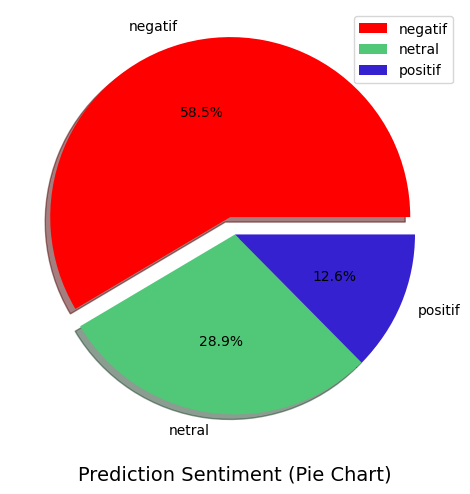

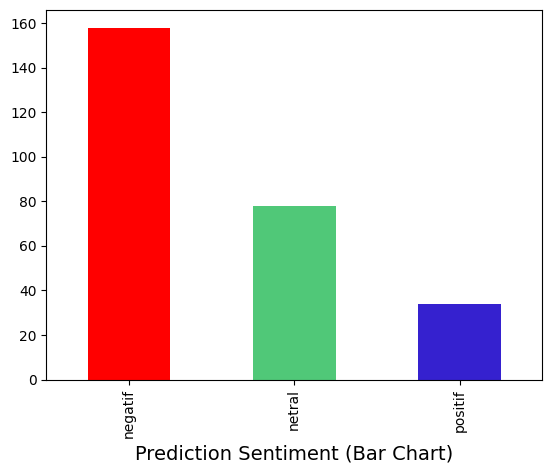

In [118]:
# Data to plot
labels = ['negatif', 'netral', 'positif']
colors = ('#FF0000', '#50C878', '#3521cf')
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
fig, ax = plt.subplots()
ax.pie(test_data.Prediction.value_counts(), labels=labels, autopct='%.1f%%', explode=explode, shadow=True, colors=colors)
ax.legend(labels, loc='best')
ax.set_aspect('equal')
plt.tight_layout()
plt.xlabel('Prediction Sentiment (Pie Chart)', fontsize=14)
plt.show()

# Menampilkan grafik review berdasarkan sentiment dalam bentuk grafik bar
test_data['Prediction'].value_counts(dropna=False).sort_index().plot(kind='bar', color=['#FF0000', '#50C878', '#3521cf'])
plt.xlabel('Prediction Sentiment (Bar Chart)', fontsize=14)
plt.show()

In [119]:
def sentiment_analysis(text, model):
    # Preprocessing
    text_prep = text_preprocessing(text)
    text_matrix = vectorizer.transform([text_prep])

    # Predict
    # The `predict` method returns the predicted class label (e.g., 'negatif', 'netral', 'positif')
    # as a string inside a NumPy array.
    # The `predict_proba` method returns the probabilities for each class.
    pred_label_array = model.predict(text_matrix.toarray())
    proba = model.predict_proba(text_matrix.toarray())

    # Get the index of the class with the highest probability.
    # This index corresponds to the internal order of classes in the model (e.g., 0, 1, 2).
    # Assuming the order is consistent with how `predict_proba` and `model.classes_` represent them.
    # From the classification report, the order seems to be 'negatif' (index 0), 'netral' (index 1), 'positif' (index 2).
    class_index = proba.argmax(axis=1)[0]

    # Plot results
    fig, ax = plt.subplots(figsize=(5, 3))

    # Determine sentiment_text and color based on class_index
    if class_index == 0:  # Assuming 0 corresponds to 'negatif'
        sentiment_text = 'Negatif'
        class_proba = int(proba[0][0].round(2)*100)
        color = 'Crimson'
    elif class_index == 1: # Assuming 1 corresponds to 'netral'
        sentiment_text = 'Netral'
        class_proba = int(proba[0][1].round(2)*100)
        color = 'Lightgrey'
    elif class_index == 2: # Assuming 2 corresponds to 'positif'
        sentiment_text = 'Positif'
        class_proba = int(proba[0][2].round(2)*100)
        color = 'DeepSkyBlue'
    else:
        # Fallback for unexpected class_index (should not occur if classes are always 0, 1, 2)
        sentiment_text = 'Unknown'
        class_proba = 0
        color = 'Black'

    ax.text(0.5, 0.5, sentiment_text, fontsize=50, ha='center', color=color)
    ax.text(0.5, 0.20, str(class_proba) + '%', fontsize=14, ha='center')
    ax.axis('off')
    ax.set_title('Sentiment Analysis', fontsize=14)
    plt.show()

In [120]:
# Load the model NB and vectorizer
filename = 'Tuning-Model-NB.pkl'
classifier = pickle.load(open(filename, 'rb'))

filename = 'vectorizer.pkl'
vectorizer = pickle.load(open(filename, 'rb'))

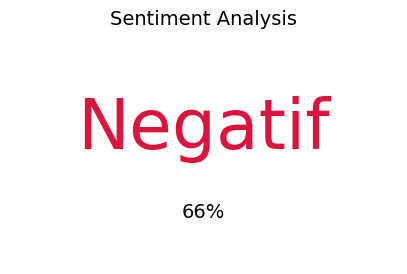

In [121]:
comment = """
           Kenaikan gaji DPR itu sangat tidak adil, malah membebani rakyat yang sudah susah. DPR harusnya fokus memberantas korupsi, bukan menambah beban rakyat.
          """
sentiment_analysis(comment, model=classifier)

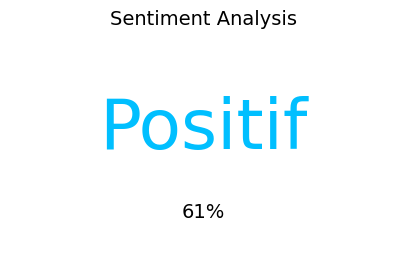

In [122]:
comment = """
         "Mantap, saya sangat setuju Luar biasa"
          """
sentiment_analysis(comment, model=classifier)

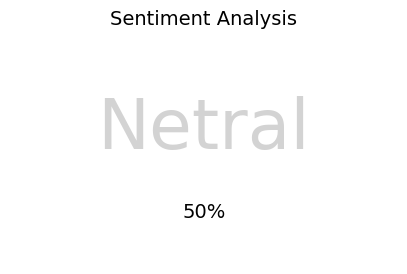

In [123]:
comment = """
         "Netral aja , gk ngefek juga ke aku"
          """
sentiment_analysis(comment, model=classifier)

In [68]:
print("Classes in model:", classifier.best_estimator_.classes_)

Classes in model: ['negatif' 'netral' 'positif']
